## Logistic Regression
https://www.w3schools.com/python/python_ml_logistic_regression.asp

Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.



In [1]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
#X represents the size of a tumor in centimeters.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


## K Means
https://www.w3schools.com/python/python_ml_k-means.asp

K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


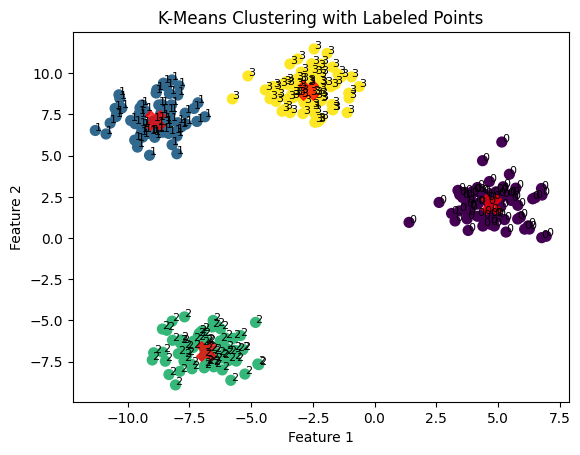

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 4
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

# 2. Apply K-Means algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 3. Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

# Add cluster numbers to each point
for i, point in enumerate(X):
    plt.text(point[0], point[1], str(y_kmeans[i]), fontsize=8, color='black')

plt.title("K-Means Clustering with Labeled Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Explanation:

Step 1: We generate synthetic data with make_blobs, which creates points around predefined centers (clusters).

Step 2: We fit the K-Means algorithm using kmeans.fit(), which groups the data into clusters. The number of clusters is specified in n_clusters.

Step 3: We visualize the clusters, including the cluster centers.

## Decision Tree

Decision Trees are intuitive models for classification and regression tasks. They split the data into smaller subsets based on certain decision criteria, visualized as a tree structure. Below is an expressive code example and a visualization for a Decision Tree classifier.

Accuracy of the Decision Tree: 1.00


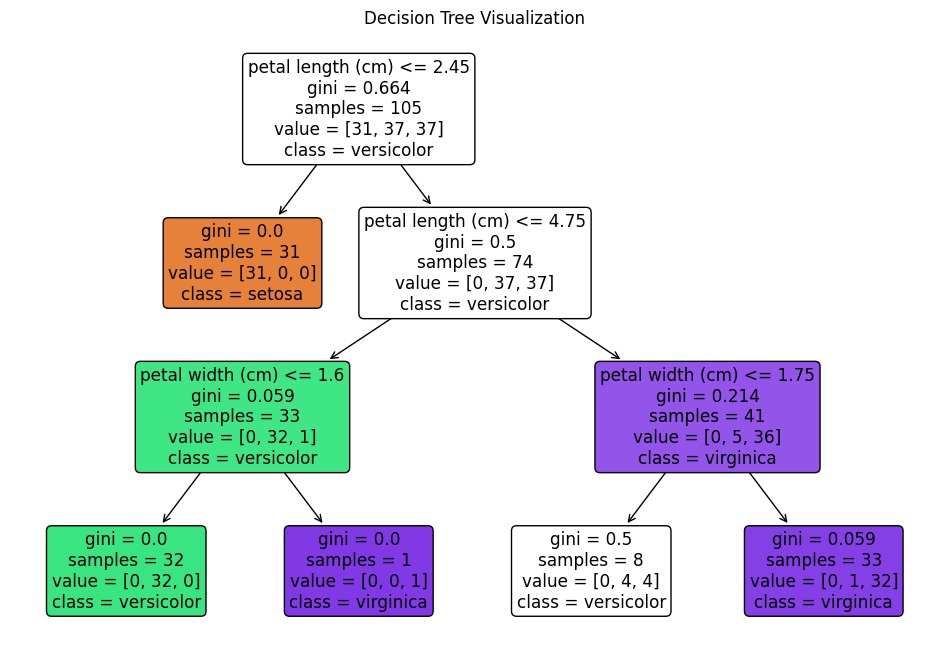

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load a simple dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# 2. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the Decision Tree model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = clf.predict(X_test)

# 5. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy:.2f}")

# 6. Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


Code Breakdown:
Dataset: We load the Iris dataset (load_iris()), which is a classic dataset for classification tasks, containing 150 samples of iris flowers with 4 features each.

Train-Test Split: The dataset is split into 70% training and 30% testing sets using train_test_split().

Decision Tree Model:

We use DecisionTreeClassifier() with the Gini impurity criterion and limit the tree depth to 3 (max_depth=3) to keep the tree small and interpretable.
The model is trained using clf.fit() on the training data.
Prediction and Accuracy:

Predictions are made on the test set (y_pred = clf.predict(X_test)), and the model's accuracy is computed using accuracy_score().
Visualization:

We visualize the decision tree using plot_tree() with the feature and class names labeled. The decision points in the tree are based on the Gini index (or another criterion like entropy), and the nodes show the classification of data.
Explanation:
Nodes: Represent decision points based on feature values.
Edges: Show the possible paths from a decision point (e.g., if a feature value is above or below a threshold).
Leaves: Contain the final classification outcome (the majority class in that subset).

## Random Forest


Random Forest is an ensemble learning method that constructs multiple decision trees and combines their results for more robust and accurate predictions. It reduces overfitting compared to a single Decision Tree by averaging the results of multiple trees.

Accuracy of the Random Forest: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



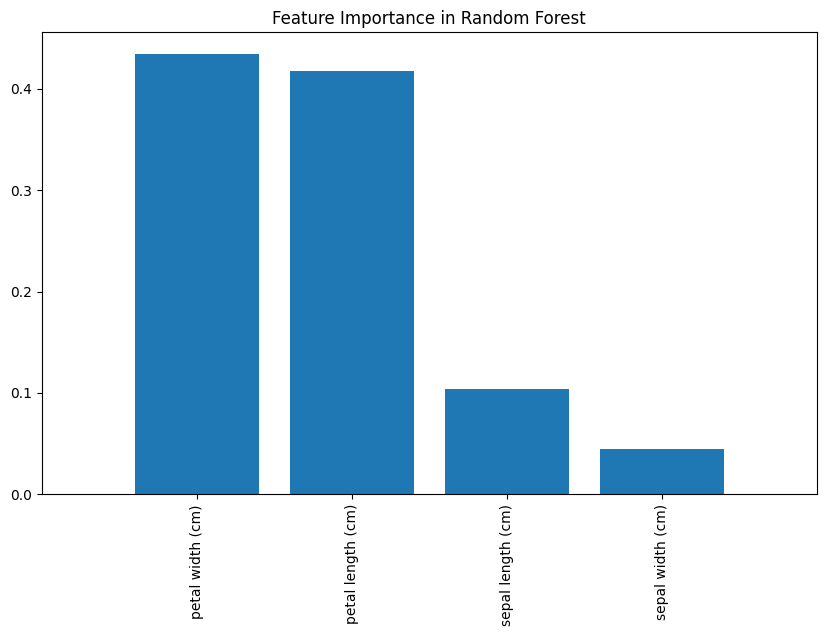

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Load dataset (Iris)
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# 5. Calculate accuracy and show the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 6. Feature importance visualization
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Code Breakdown:
Dataset:

We load the Iris dataset (load_iris()), which consists of 150 samples and 4 features, each labeled with one of three iris flower species.
Train-Test Split:

We split the data into 70% training and 30% testing sets with train_test_split().
Random Forest Model:

We use RandomForestClassifier() with 100 trees (n_estimators=100). Each tree is built on a random subset of the data and features.
The model is trained using rf_clf.fit().
Prediction and Accuracy:

We make predictions on the test set using rf_clf.predict().
We compute accuracy using accuracy_score() and display a more detailed evaluation with classification_report().
Feature Importance:

Random Forest can show which features are more important for the classification. We retrieve feature importances with rf_clf.feature_importances_ and visualize them in a bar chart.
Explanation:
Ensemble of Trees: The Random Forest model builds multiple decision trees and averages their predictions. This ensemble approach improves accuracy and generalization over a single decision tree.

Feature Importance: The model ranks the features based on how often they are used in the decision trees. In this example, feature importance helps us understand which features (e.g., petal length or sepal width) are most influential in classifying the iris species.

Classification Report: It includes precision, recall, and F1-score, giving a better understanding of the model's performance across all classes.

## Support Vector Machine (SVM) 

a supervised learning algorithm used for classification and regression tasks. It is effective for high-dimensional datasets and works well with both linear and non-linear data by using a kernel trick.

Accuracy of the SVM: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



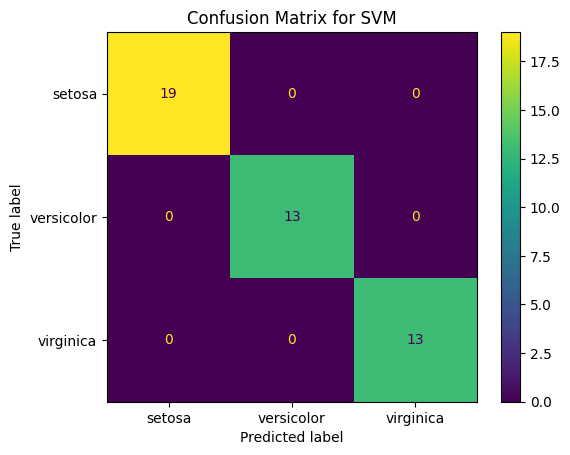

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1. Load the dataset (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the SVM model (Support Vector Classifier)
# 'linear' kernel for linear classification, 'rbf' (Gaussian) kernel for non-linear classification
svm_clf = SVC(kernel='linear', C=1, random_state=42)  # C is the regularization parameter
svm_clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# 5. Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 6. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_clf, X_test, y_test, display_labels=class_names)
plt.title("Confusion Matrix for SVM")
plt.show()


Code Breakdown:
Dataset:

We use the Iris dataset, which is a simple and well-known dataset for classification tasks. It has 150 samples and 4 features, with 3 classes of iris flowers.
Train-Test Split:

We split the dataset into 70% training and 30% testing sets using train_test_split().
SVM Model:

SVC() is used to build the Support Vector Machine model. The kernel used here is linear, but you can change it to rbf (Gaussian), poly, or others for non-linear problems.
The C parameter controls the regularization, which balances the trade-off between correctly classifying training examples and maximizing the margin between classes.
Prediction and Accuracy:

We use the trained model to make predictions on the test set and compute accuracy using accuracy_score().
Classification Report:

This gives a detailed performance evaluation, including precision, recall, F1-score for each class, and overall accuracy.
Confusion Matrix:

The confusion matrix visually represents the classification results, showing the number of correct and incorrect classifications.
Kernels in SVM:
Linear Kernel: Suitable for linearly separable data. It finds a straight line (or hyperplane) that separates the classes.
RBF Kernel: Best for non-linear data. It transforms the data into a higher-dimensional space and finds a hyperplane to separate the classes.
Polynomial Kernel: Useful for polynomial relationships between features.
Explanation:
SVM Objective: SVM tries to find the hyperplane (decision boundary) that maximizes the margin between classes. The margin is the distance between the hyperplane and the closest data points (support vectors).
Regularization (C parameter): Controls the trade-off between maximizing the margin and minimizing classification errors on the training data.

## The K-Nearest Neighbors (KNN) algorithm 

is an instance-based learning algorithm used for both classification and regression tasks. It works by finding the k closest points (neighbors) to a given data point and assigning the class that is most common among those neighbors (for classification) or averaging the values (for regression).

Accuracy of the KNN Classifier: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



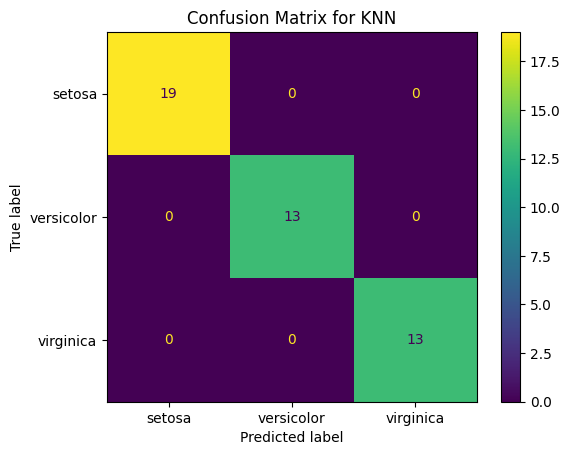

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the KNN model (K-Nearest Neighbors)
k = 5  # Number of neighbors to consider
knn_clf = KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = knn_clf.predict(X_test)

# 5. Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN Classifier: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 6. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_clf, X_test, y_test, display_labels=class_names)
plt.title("Confusion Matrix for KNN")
plt.show()


Code Breakdown:
Dataset:

We use the Iris dataset, which is a common classification dataset that contains 150 samples with 4 features (sepal length, sepal width, petal length, and petal width) and 3 classes of iris flowers.
Train-Test Split:

We split the data into 70% training and 30% testing using train_test_split().
KNN Model:

KNeighborsClassifier() is used to create a KNN model with k=5 neighbors (you can adjust k based on your problem).
The model is trained with the fit() method on the training data.
Prediction and Accuracy:

We use the trained KNN model to predict the labels for the test data.
accuracy_score() computes the accuracy of the model, and classification_report() provides detailed evaluation metrics like precision, recall, and F1-score.
Confusion Matrix:

A confusion matrix is displayed to visually show how many predictions were correct or incorrect for each class.
Key Concepts in KNN:
Number of Neighbors (k): The most critical parameter in KNN is the number of neighbors k. A small k makes the model sensitive to noise, while a large k smooths out the decision boundary but might miss some fine details.
Distance Metric: KNN uses a distance metric (commonly Euclidean distance) to find the closest neighbors to a query point.
Choosing the Value of k:
Small k: Sensitive to noise and may overfit.
Large k: Provides a smoother boundary and generalizes better but may underfit the data.
Explanation:
KNN works by storing all available cases and classifies new data points based on similarity (distance) to existing data. The model is simple and requires no training beyond storing the dataset.

Lazy Learning: KNN is a "lazy" learning algorithm, meaning it does not build a model explicitly but makes decisions at runtime by looking at the nearest neighbors.

Decision Boundary: For classification, KNN finds the majority class among the neighbors of a point to predict the label.

Advantages:
Simple: KNN is easy to understand and implement.
No Training Phase: Unlike other models, KNN doesn't have an explicit training phase.
Disadvantages:
Computationally Expensive: KNN can be slow during prediction because it computes the distance to every point in the dataset.
Sensitive to Irrelevant Features: If features are not scaled properly or irrelevant features are present, it may impact performance.

## Naive Bayes

is a simple yet effective probabilistic classifier based on Bayes' Theorem. It is called "naive" because it assumes that all features are independent of each other, which is often not true in real-world data, but the model works surprisingly well for many tasks, particularly text classification.

Accuracy of the Naive Bayes Classifier: 0.98

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



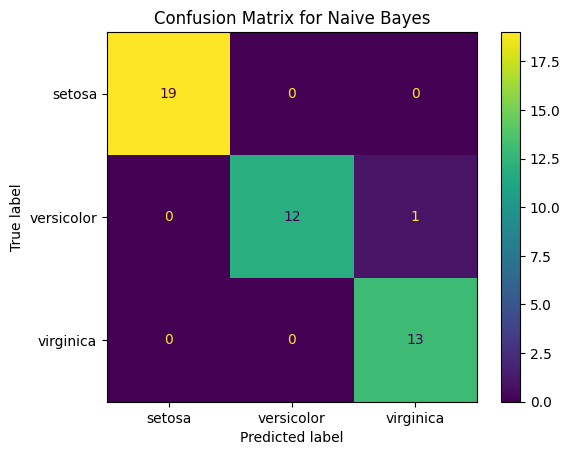

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the Naive Bayes model (GaussianNB)
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = nb_clf.predict(X_test)

# 5. Calculate accuracy and show the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive Bayes Classifier: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 6. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nb_clf, X_test, y_test, display_labels=class_names)
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


Code Breakdown:
Dataset:

We use the Iris dataset again, which has 4 features (sepal length, sepal width, petal length, and petal width) and 3 classes of iris flowers.
Train-Test Split:

We split the data into 70% training and 30% testing sets using train_test_split().
Naive Bayes Model:

GaussianNB() is used to create a Gaussian Naive Bayes model. It assumes that the features follow a Gaussian distribution.
We train the model with the fit() method on the training data.
Prediction and Accuracy:

We use the trained model to predict the test labels and compute accuracy using accuracy_score().
classification_report() gives a detailed evaluation, including precision, recall, and F1-score for each class.
Confusion Matrix:

A confusion matrix is displayed to visually show the number of correct and incorrect classifications for each class.
Naive Bayes Model Types:
Gaussian Naive Bayes:
Assumes that the features follow a Gaussian distribution (used for continuous data).
Suitable for datasets where feature values are continuous (like the Iris dataset).
Multinomial Naive Bayes:
Often used for text classification problems, where features represent word counts or term frequencies (used for discrete data).
Bernoulli Naive Bayes:
Assumes binary features (e.g., presence or absence of a word in a document).
Bayes' Theorem:
The core idea behind Naive Bayes is Bayes' Theorem:

𝑃
(
𝐴
∣
𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)
⋅
𝑃
(
𝐴
)
𝑃
(
𝐵
)
P(A∣B)= 
P(B)
P(B∣A)⋅P(A)
​
 
Where:

𝑃
(
𝐴
∣
𝐵
)
P(A∣B) is the probability of class 
𝐴
A given the evidence 
𝐵
B.
𝑃
(
𝐵
∣
𝐴
)
P(B∣A) is the probability of the evidence 
𝐵
B given that the instance is of class 
𝐴
A.
𝑃
(
𝐴
)
P(A) is the prior probability of class 
𝐴
A.
𝑃
(
𝐵
)
P(B) is the probability of the evidence 
𝐵
B across all classes.
Explanation:
Naive Bayes works well with small datasets and is computationally efficient.

It assumes conditional independence between features, which is a strong assumption that often doesn’t hold true. However, Naive Bayes still performs well in many practical applications, especially in text classification (e.g., spam filtering).

Advantages:

Simple and fast.
Effective for high-dimensional data (e.g., text data).
Disadvantages:

The assumption of feature independence is often unrealistic.
It can struggle with numeric features that don't follow a Gaussian distribution (in the case of GaussianNB).
Use Cases:
Text Classification: Spam detection, sentiment analysis, document categorization.
Medical Diagnosis: Predicting whether a patient has a disease based on symptoms.
Real-time Predictions: Naive Bayes is very fast, making it suitable for real-time predictions.

## Gradient Boosting 

is a powerful machine learning technique for both regression and classification tasks. It builds models in a sequential manner, where each new model tries to correct the errors of the previous ones. By combining weak learners (usually decision trees) into a strong learner, it achieves high predictive accuracy.

Accuracy of the Gradient Boosting Classifier: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



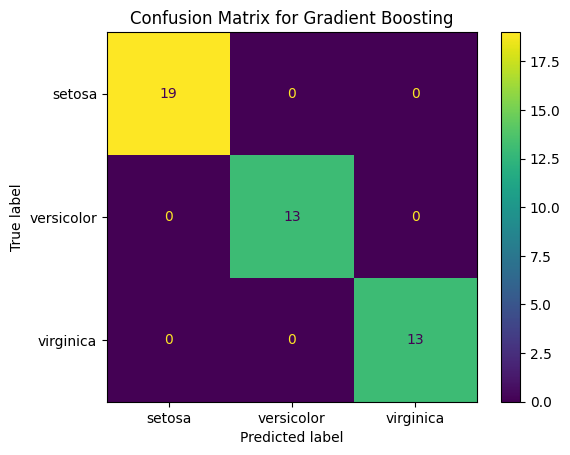

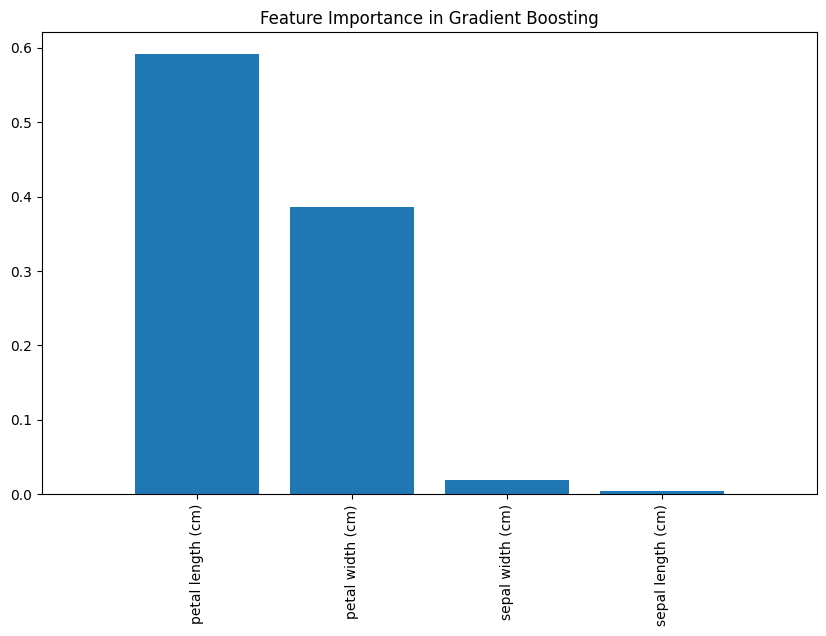

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# 5. Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Gradient Boosting Classifier: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 6. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(gb_clf, X_test, y_test, display_labels=class_names)
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

# 7. Feature importance visualization
importances = gb_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Gradient Boosting")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Code Breakdown:
Dataset:

We use the Iris dataset, which contains 150 samples with 4 features and 3 classes of iris flowers.
Train-Test Split:

The dataset is split into 70% training and 30% testing using train_test_split().
Gradient Boosting Model:

GradientBoostingClassifier() creates a Gradient Boosting model. Important parameters:
n_estimators=100: The number of boosting rounds (i.e., the number of decision trees to be trained sequentially).
learning_rate=0.1: Determines how much each tree contributes to the overall model. Lower values (e.g., 0.01) make the model more robust but slower to train.
max_depth=3: Controls the depth of each individual tree, preventing overfitting.
The model is trained using fit() on the training data.
Prediction and Accuracy:

The trained model is used to predict the labels for the test data.
accuracy_score() computes the model's accuracy, and classification_report() gives a detailed evaluation, including precision, recall, and F1-score.
Confusion Matrix:

A confusion matrix is displayed to show the number of correct and incorrect classifications.
Feature Importance:

Gradient Boosting can calculate feature importance, showing how much each feature contributes to the model’s predictions. This is visualized as a bar chart.
Gradient Boosting Key Concepts:
Boosting: A sequential learning technique where each new model (weak learner) focuses on correcting the errors of the previous model. The final prediction is an aggregation of all models' predictions.

Weak Learners: In Gradient Boosting, the weak learners are typically shallow decision trees. These are decision trees with low depth, usually preventing overfitting but still capable of making reasonable predictions.

Learning Rate: Controls the contribution of each tree to the final model. A lower learning rate makes the model more accurate but slower to train (requires more trees).

n_estimators: The number of trees in the ensemble. More trees can increase accuracy but also risk overfitting if not controlled properly (often combined with a lower learning rate).

Explanation:
Gradient Boosting improves over time: Each tree in the sequence is trained to correct the errors made by the previous ones. This creates a model that continuously improves.

Feature Importance: Gradient Boosting calculates feature importance by determining how much each feature reduces the loss function (i.e., how much it contributes to improving predictions).

Advantages:

High accuracy and performance, especially on structured/tabular data.
Can handle both regression and classification tasks.
Automatically handles feature importance.
Disadvantages:

Computationally expensive and slow to train, especially for large datasets.
More prone to overfitting if hyperparameters (e.g., number of trees, depth) aren’t well-tuned.
Popular Implementations of Gradient Boosting:

XGBoost:
Highly optimized, fast implementation of Gradient Boosting.
Often used in machine learning competitions like Kaggle.

LightGBM:
A faster implementation for large datasets, optimized for both speed and memory efficiency.
CatBoost:
Designed for datasets with categorical features, handling categorical data natively without the need for one-hot encoding.

*Let’s walk through a basic example of a neural network using Python and the keras library, which is part of TensorFlow. We’ll build a simple neural network for classifying the MNIST dataset, which consists of handwritten digits (0-9).*

## Neural Network

for Digit Classification
Here's how you can create and train a neural network to classify handwritten digits using the MNIST dataset:

2024-08-19 15:43:01.570627: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 15:43:01.570791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 15:43:01.738908: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 - 7s - 5ms/step - accuracy: 0.9188 - loss: 0.2831 - val_accuracy: 0.9585 - val_loss: 0.1496
Epoch 2/5
1500/1500 - 6s - 4ms/step - accuracy: 0.9621 - loss: 0.1265 - val_accuracy: 0.9613 - val_loss: 0.1280
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9744 - loss: 0.0871 - val_accuracy: 0.9688 - val_loss: 0.1039
Epoch 4/5
1500/1500 - 5s - 4ms/step - accuracy: 0.9805 - loss: 0.0659 - val_accuracy: 0.9696 - val_loss: 0.1050
Epoch 5/5
1500/1500 - 5s - 3ms/step - accuracy: 0.9845 - loss: 0.0510 - val_accuracy: 0.9732 - val_loss: 0.0906
313/313 - 1s - 2ms/step - accuracy: 0.9743 - loss: 0.0850
Test accuracy: 0.97
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97   

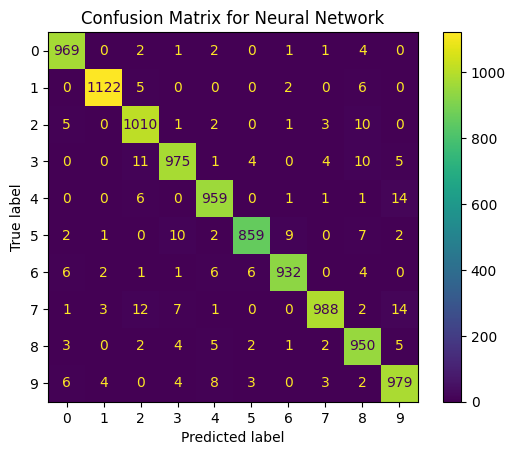

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1. Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten the 28x28 images to a 1D array
    Dense(128, activation='relu'),       # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')      # Output layer with 10 neurons (one for each class) and softmax activation
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=2)

# 5. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {accuracy:.2f}")

# 6. Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# 7. Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred, display_labels=[str(i) for i in range(10)])
plt.title("Confusion Matrix for Neural Network")
plt.show()


Code Breakdown:
Loading and Preprocessing Data:

MNIST Dataset: Contains 60,000 training images and 10,000 testing images of handwritten digits.
Normalization: Pixel values are scaled to the range [0, 1] for better convergence during training.
One-Hot Encoding: Converts the categorical labels into binary matrices (e.g., [0, 1, 0, 0, ...] for digit 1).
Defining the Neural Network Model:

Sequential Model: A linear stack of layers where each layer has connections only to the previous and next layers.
Flatten Layer: Converts the 2D image array (28x28) into a 1D array.
Dense Layers: Fully connected layers where each neuron is connected to every neuron in the previous layer.
Activation Functions: ReLU for hidden layers introduces non-linearity, softmax for the output layer converts logits to probabilities.
Compiling the Model:

Optimizer: Adam is an efficient optimization algorithm.
Loss Function: categorical_crossentropy is used for multi-class classification problems.
Metrics: accuracy is monitored during training.
Training the Model:

Epochs: The model is trained for 5 epochs, iterating over the training data.
Validation Split: 20% of training data is used for validation.
Evaluating the Model:

Loss and Accuracy: Evaluate the model’s performance on the test set.
Making Predictions:

Probabilities: The model outputs probabilities for each class.
Predictions: Convert probabilities to class labels using np.argmax().
Classification Report and Confusion Matrix:

Classification Report: Provides precision, recall, and F1-score for each class.
Confusion Matrix: Visualizes the performance of the model, showing how many samples were correctly or incorrectly classified for each class.
Explanation:
Neural Networks: This example demonstrates a simple feedforward neural network, which is easy to implement and understand but powerful enough to handle image classification tasks.
Training Process: During training, the model adjusts its weights to minimize the loss function using backpropagation and optimization algorithms.
This example provides a basic introduction to neural networks. For more complex tasks, such as working with large datasets or more intricate models, you can explore more advanced architectures and techniques.

## Convolutional Neural Networks (CNNs)

are a specialized type of neural network designed to process grid-like data such as images. They are particularly effective for tasks involving spatial hierarchies, such as image recognition and object detection.

Key Components of CNNs:
Convolutional Layers: These layers apply convolutional filters (kernels) to the input image, creating feature maps that capture spatial hierarchies and patterns.
Activation Functions: Typically, ReLU (Rectified Linear Unit) is used to introduce non-linearity.
Pooling Layers: These layers reduce the spatial dimensions of the feature maps, often using operations like max pooling or average pooling, which helps reduce computational complexity and extract important features.
Fully Connected Layers: After several convolutional and pooling layers, the network often includes fully connected layers to make final predictions.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 - 30s - 20ms/step - accuracy: 0.9485 - loss: 0.1653 - val_accuracy: 0.9778 - val_loss: 0.0730
Epoch 2/5
1500/1500 - 27s - 18ms/step - accuracy: 0.9836 - loss: 0.0512 - val_accuracy: 0.9858 - val_loss: 0.0508
Epoch 3/5
1500/1500 - 27s - 18ms/step - accuracy: 0.9881 - loss: 0.0371 - val_accuracy: 0.9884 - val_loss: 0.0424
Epoch 4/5
1500/1500 - 28s - 18ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9909 - val_loss: 0.0311
Epoch 5/5
1500/1500 - 40s - 27ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9912 - val_loss: 0.0336
313/313 - 2s - 7ms/step - accuracy: 0.9917 - loss: 0.0298
Test accuracy: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      1.00      1032
           3       0.99      0.99      0.99      1010
           4    

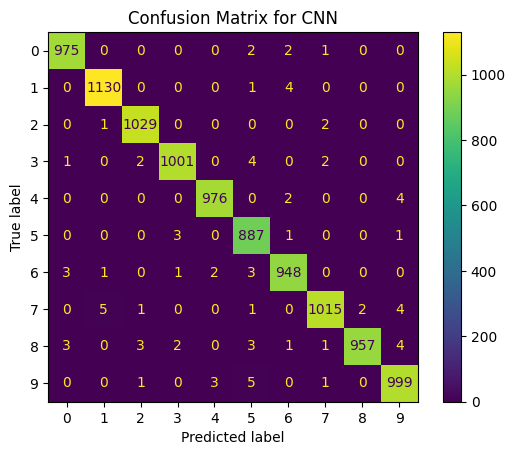

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data to include a single color channel (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),   # Convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D((2, 2)),                                             # Max pooling layer with 2x2 pool size
    Conv2D(64, (3, 3), activation='relu'),                            # Second convolutional layer with 64 filters
    MaxPooling2D((2, 2)),                                             # Second max pooling layer
    Conv2D(64, (3, 3), activation='relu'),                            # Third convolutional layer
    Flatten(),                                                         # Flatten the 3D feature maps to 1D
    Dense(64, activation='relu'),                                     # Fully connected layer with 64 neurons
    Dense(10, activation='softmax')                                   # Output layer with 10 neurons for each digit class
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=2)

# 5. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {accuracy:.2f}")

# 6. Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# 7. Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred, display_labels=[str(i) for i in range(10)])
plt.title("Confusion Matrix for CNN")
plt.show()


Code Breakdown:
Loading and Preprocessing Data:

MNIST Dataset: Contains 60,000 training images and 10,000 test images of 28x28 grayscale digits.
Reshape Data: Convert the image data to include a single color channel.
Normalization: Scale pixel values to the range [0, 1].
One-Hot Encoding: Convert class labels into binary matrices.
Defining the CNN Model:

Conv2D Layers: Apply convolutional operations to extract features. 32, 64 denote the number of filters.
MaxPooling2D Layers: Reduce the spatial dimensions of feature maps to make the model computationally efficient.
Flatten Layer: Converts 3D feature maps into 1D arrays.
Dense Layers: Fully connected layers that make final predictions.
Compiling the Model:

Optimizer: Adam is used for efficient optimization.
Loss Function: categorical_crossentropy for multi-class classification.
Metrics: accuracy to monitor performance.
Training the Model:

Epochs: Number of times the model iterates over the entire training dataset.
Validation Split: 20% of the training data is used for validation during training.
Evaluating the Model:

Loss and Accuracy: Performance metrics on the test set.
Making Predictions:

Probabilities: The model outputs probabilities for each class.
Predictions: Convert probabilities to class labels.
Classification Report and Confusion Matrix:

Classification Report: Provides precision, recall, and F1-score for each class.
Confusion Matrix: Visual representation of classification performance.
CNN Advantages:
Feature Extraction: Automatically learns and extracts features from images.
Spatial Hierarchies: Captures spatial relationships and patterns, making them highly effective for image-related tasks.
Parameter Sharing: Convolutional layers share weights across spatial locations, reducing the number of parameters and improving efficiency.
CNN Disadvantages:
Computational Resources: Training CNNs can be resource-intensive, requiring GPUs for efficient processing.
Data Requirements: CNNs generally require large amounts of labeled data to perform well.
CNNs are a powerful tool for various tasks beyond image classification, including object detection, semantic segmentation, and more.

## Recurrent Neural Networks (RNNs) 

are designed for processing sequential data, such as time series or natural language. They are particularly well-suited for tasks where the context from previous inputs is important for understanding the current input.

Key Concepts in RNNs:
Recurrent Connections: RNNs have connections that loop back on themselves, allowing them to maintain a hidden state across time steps. This enables the network to retain information from previous inputs.

Hidden State: The hidden state of an RNN carries information from previous time steps and is updated at each time step.

Vanishing and Exploding Gradients: RNNs can struggle with long-term dependencies due to vanishing or exploding gradients during backpropagation.

Variants of RNNs:
Vanilla RNNs: The basic form of RNNs, often limited by issues with long-term dependencies.

Long Short-Term Memory (LSTM): A type of RNN designed to address the vanishing gradient problem by using gating mechanisms to control the flow of information.

Gated Recurrent Unit (GRU): A variant of LSTM with a simpler architecture that also helps mitigate long-term dependency issues.

Example: RNN for Sequence Prediction
Here’s a simple example using an RNN to predict the next character in a sequence of text. We'll use TensorFlow and Keras for this example.

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text data
texts = ["hello world", "hello there", "how are you", "hello again"]

# Tokenize and prepare sequences
tokenizer = Tokenizer(char_level=True)  # Character-level tokenization
tokenizer.fit_on_texts(texts)
total_chars = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(texts)
X = [seq[:-1] for seq in sequences]  # Input sequences (excluding the last character)
y = [seq[1:] for seq in sequences]   # Target sequences (excluding the first character)

X = pad_sequences(X, maxlen=10, padding='pre')
y = pad_sequences(y, maxlen=10, padding='pre')

# One-hot encode the target sequences
y = tf.keras.utils.to_categorical(y, num_classes=total_chars)

# Define the RNN model
model = Sequential([
    Embedding(input_dim=total_chars, output_dim=10, input_length=10),
    SimpleRNN(50, return_sequences=True),
    Dense(total_chars, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, verbose=2)

# Make a prediction
def predict_next_char(model, tokenizer, text):
    seq = tokenizer.texts_to_sequences([text])
    seq = pad_sequences(seq, maxlen=10, padding='pre')
    pred = model.predict(seq)
    next_char_index = np.argmax(pred[0, -1])
    next_char = tokenizer.index_word[next_char_index]
    return next_char

# Test the model
test_text = "hello "
predicted_char = predict_next_char(model, tokenizer, test_text)
print(f"Next character prediction for '{test_text}': {predicted_char}")


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 - 2s - 2s/step - accuracy: 0.0250 - loss: 2.7807
Epoch 2/10
1/1 - 0s - 27ms/step - accuracy: 0.0500 - loss: 2.7711
Epoch 3/10
1/1 - 0s - 27ms/step - accuracy: 0.0500 - loss: 2.7618
Epoch 4/10
1/1 - 0s - 29ms/step - accuracy: 0.1000 - loss: 2.7527
Epoch 5/10
1/1 - 0s - 28ms/step - accuracy: 0.1250 - loss: 2.7436
Epoch 6/10
1/1 - 0s - 31ms/step - accuracy: 0.1250 - loss: 2.7343
Epoch 7/10
1/1 - 0s - 28ms/step - accuracy: 0.1500 - loss: 2.7249
Epoch 8/10
1/1 - 0s - 27ms/step - accuracy: 0.3000 - loss: 2.7150
Epoch 9/10
1/1 - 0s - 31ms/step - accuracy: 0.3750 - loss: 2.7048
Epoch 10/10
1/1 - 0s - 29ms/step - accuracy: 0.4250 - loss: 2.6939
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Next character prediction for 'hello ': u


Code Breakdown:
Text Preprocessing:

Tokenization: Convert text into sequences of integers. char_level=True allows us to work at the character level.
Sequences: Create input and target sequences for training. The input sequence (X) is one character short of the target sequence (y).
Padding:

Pad Sequences: Ensure all input and target sequences have the same length.
Model Definition:

Embedding Layer: Converts integer sequences into dense vectors of fixed size.
SimpleRNN Layer: A basic RNN layer with 50 units, processes sequences and maintains a hidden state.
Dense Layer: Output layer with softmax activation to predict the next character from the vocabulary.
Training:

Compile: The model uses adam optimizer and categorical_crossentropy loss function.
Fit: Train the model for 10 epochs.
Prediction:

predict_next_char(): Function to predict the next character given a text input. Converts the text to sequence, pads it, and predicts the next character.
RNN Advantages:
Sequence Modeling: RNNs are effective at handling sequences where the order of data is important.
Memory: Retain information from previous time steps, allowing them to model temporal dependencies.

RNN Disadvantages:

Training Challenges: Struggles with long-term dependencies due to vanishing and exploding gradients.

Computational Cost: Can be slow to train due to sequential processing.

Variants and Improvements:
LSTM: Addresses long-term dependencies better than basic RNNs by using memory cells and gates.

GRU: Simplifies LSTM architecture while achieving similar performance.

RNNs, especially LSTMs and GRUs, are widely used in tasks such as natural language processing, time series prediction, and more. 